In [1]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw as draw_graph
import numpy as np

n = 5

graph = rx.PyGraph()
graph.add_nodes_from(np.arange(0, n, 1))
#edge_list = [(0, 1, 1.0), (0, 2, 1.0), (0, 4, 1.0), (1, 2, 1.0), (2, 3, 1.0), (3, 4, 1.0)]
#edge_list = [(0, 1, 1.0), (0, 2, 1.0), (0, 4, 1.0), (0, 3, 1.0)]

#graph = rx.undirected_gnp_random_graph(n, 0.5)

graph.add_edges_from(edge_list)
draw_graph(graph, node_size=600, with_labels=True)

NameError: name 'edge_list' is not defined

Generated edge list: [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (0, 4, 1.0), (0, 5, 1.0), (0, 6, 1.0), (0, 8, 1.0), (0, 13, 1.0), (0, 14, 1.0), (0, 15, 1.0), (1, 2, 1.0), (1, 3, 1.0), (1, 6, 1.0), (1, 7, 1.0), (1, 9, 1.0), (1, 12, 1.0), (1, 13, 1.0), (1, 14, 1.0), (2, 4, 1.0), (2, 5, 1.0), (2, 6, 1.0), (2, 8, 1.0), (2, 10, 1.0), (2, 13, 1.0), (2, 14, 1.0), (2, 15, 1.0), (3, 4, 1.0), (3, 7, 1.0), (3, 8, 1.0), (3, 11, 1.0), (3, 12, 1.0), (3, 13, 1.0), (3, 15, 1.0), (4, 5, 1.0), (4, 9, 1.0), (4, 12, 1.0), (4, 15, 1.0), (5, 7, 1.0), (5, 8, 1.0), (5, 9, 1.0), (5, 11, 1.0), (5, 13, 1.0), (5, 14, 1.0), (5, 15, 1.0), (6, 7, 1.0), (6, 9, 1.0), (6, 11, 1.0), (6, 12, 1.0), (7, 8, 1.0), (7, 9, 1.0), (7, 12, 1.0), (7, 15, 1.0), (8, 10, 1.0), (8, 13, 1.0), (8, 14, 1.0), (8, 15, 1.0), (9, 12, 1.0), (9, 13, 1.0), (9, 14, 1.0), (10, 14, 1.0), (10, 15, 1.0), (11, 12, 1.0), (11, 15, 1.0), (12, 13, 1.0), (12, 14, 1.0), (14, 15, 1.0)]


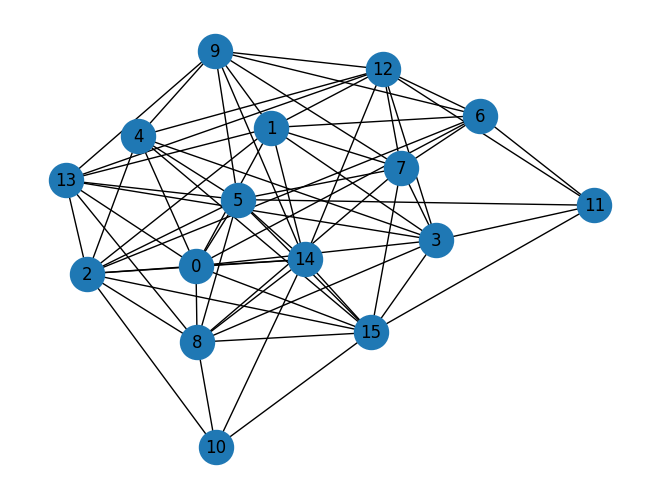

In [4]:
import itertools
import random

# Define the number of nodes and probability for edge creation
n = 16
edge_probability = 0.5

graph = rx.PyGraph()
graph.add_nodes_from(np.arange(0, n, 1))

# Generate all possible edges (combinations of two nodes)
all_possible_edges = list(itertools.combinations(range(n), 2))

# Randomly select edges to include, with a probability of edge_probability
edge_list = [(u, v, 1.0) for u, v in all_possible_edges if random.random() < edge_probability]

print("Generated edge list:", edge_list)

graph.add_edges_from(edge_list)
draw_graph(graph, node_size=600, with_labels=True)

In [5]:
from qiskit.quantum_info import SparsePauliOp
def build_max_cut_paulis(graph: rx.PyGraph) -> list[tuple[str, float]]:
    """Convert the graph to Pauli list.

    This function does the inverse of `build_max_cut_graph`
    """
    pauli_list = []
    for edge in list(graph.edge_list()):
        paulis = ["I"] * len(graph)
        paulis[edge[0]], paulis[edge[1]] = "Z", "Z"

        weight = graph.get_edge_data(edge[0], edge[1])

        pauli_list.append(("".join(paulis)[::-1], weight))

    return pauli_list


max_cut_paulis = build_max_cut_paulis(graph)

cost_hamiltonian = SparsePauliOp.from_list(max_cut_paulis)
print("Cost Function Hamiltonian:", cost_hamiltonian)

Cost Function Hamiltonian: SparsePauliOp(['IIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIIZIZ', 'IIIIIIIIIIIIZIIZ', 'IIIIIIIIIIIZIIIZ', 'IIIIIIIIIIZIIIIZ', 'IIIIIIIIIZIIIIIZ', 'IIIIIIIZIIIIIIIZ', 'IIZIIIIIIIIIIIIZ', 'IZIIIIIIIIIIIIIZ', 'ZIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIZZI', 'IIIIIIIIIIIIZIZI', 'IIIIIIIIIZIIIIZI', 'IIIIIIIIZIIIIIZI', 'IIIIIIZIIIIIIIZI', 'IIIZIIIIIIIIIIZI', 'IIZIIIIIIIIIIIZI', 'IZIIIIIIIIIIIIZI', 'IIIIIIIIIIIZIZII', 'IIIIIIIIIIZIIZII', 'IIIIIIIIIZIIIZII', 'IIIIIIIZIIIIIZII', 'IIIIIZIIIIIIIZII', 'IIZIIIIIIIIIIZII', 'IZIIIIIIIIIIIZII', 'ZIIIIIIIIIIIIZII', 'IIIIIIIIIIIZZIII', 'IIIIIIIIZIIIZIII', 'IIIIIIIZIIIIZIII', 'IIIIZIIIIIIIZIII', 'IIIZIIIIIIIIZIII', 'IIZIIIIIIIIIZIII', 'ZIIIIIIIIIIIZIII', 'IIIIIIIIIIZZIIII', 'IIIIIIZIIIIZIIII', 'IIIZIIIIIIIZIIII', 'ZIIIIIIIIIIZIIII', 'IIIIIIIIZIZIIIII', 'IIIIIIIZIIZIIIII', 'IIIIIIZIIIZIIIII', 'IIIIZIIIIIZIIIII', 'IIZIIIIIIIZIIIII', 'IZIIIIIIIIZIIIII', 'ZIIIIIIIIIZIIIII', 'IIIIIIIIZZIIIIII', 'IIIIIIZIIZIIIIII', 'IIIIZIIIIZIIIIII', 'IIIZIIIIIZIIIIII'

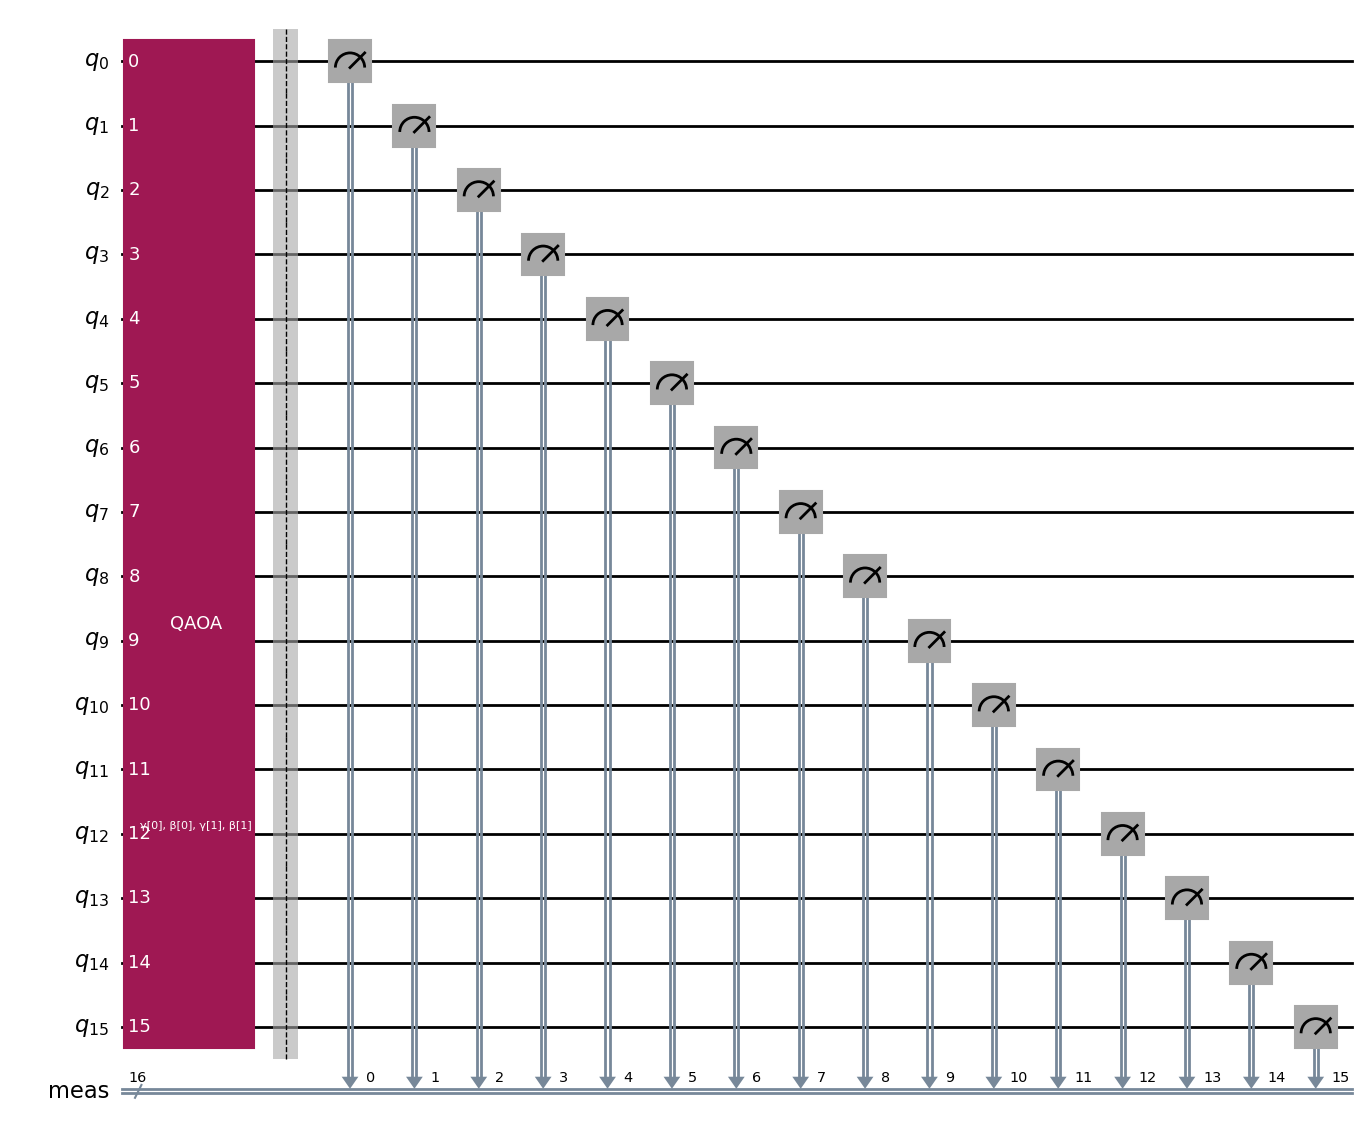

In [6]:
from qiskit.circuit.library import QAOAAnsatz

circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=2)
circuit.measure_all()

circuit.draw('mpl')

In [7]:
circuit.parameters

ParameterView([ParameterVectorElement(β[0]), ParameterVectorElement(β[1]), ParameterVectorElement(γ[0]), ParameterVectorElement(γ[1])])

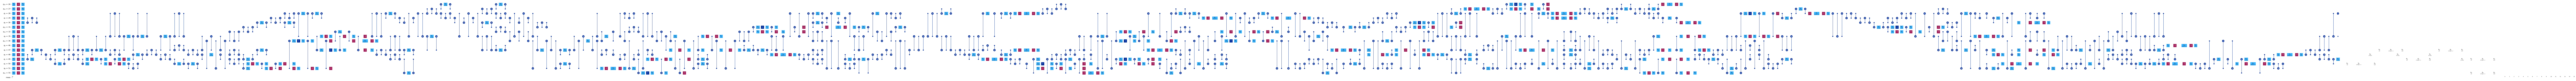

In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeWashingtonV2

# QiskitRuntimeService.save_account(channel="ibm_quantum", token="<MY_IBM_QUANTUM_TOKEN>", overwrite=True, set_as_default=True)
# service = QiskitRuntimeService(channel='ibm_quantum')
# backend = service.least_busy(min_num_qubits=127)
backend = FakeWashingtonV2()
print(backend)

# Create pass manager for transpilation
pm = generate_preset_pass_manager(optimization_level=3,
                                    backend=backend)

candidate_circuit = pm.run(circuit)
candidate_circuit.draw('mpl', fold=False, idle_wires=False)

In [9]:
initial_gamma = np.pi
initial_beta = np.pi/2
init_params = [initial_gamma, initial_beta, initial_gamma, initial_beta]

In [10]:
def cost_func_estimator(params, ansatz, hamiltonian, estimator):

    # transform the observable defined on virtual qubits to
    # an observable defined on all physical qubits
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)

    pub = (ansatz, isa_hamiltonian, params)
    job = estimator.run([pub])

    results = job.result()[0]
    cost = results.data.evs

    objective_func_vals.append(cost)


    return cost

In [11]:
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from scipy.optimize import minimize

objective_func_vals = [] # Global variable
with Session(backend=backend) as session:
    # If using qiskit-ibm-runtime<0.24.0, change `mode=` to `session=`
    estimator = Estimator(mode=session)
    estimator.options.default_shots = 1000

    # Set simple error suppression/mitigation options
    #estimator.options.dynamical_decoupling.enable = True
    #estimator.options.dynamical_decoupling.sequence_type = "XY4"
    #estimator.options.twirling.enable_gates = True
    #estimator.options.twirling.num_randomizations = "auto"

    result = minimize(
        cost_func_estimator,
        init_params,
        args=(candidate_circuit, cost_hamiltonian, estimator),
        method="COBYLA",
        tol=1e-2,
    )
    print(result)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.22577422577422582
       x: [ 4.147e+00  2.099e+00  3.982e+00  2.595e+00]
    nfev: 27
   maxcv: 0.0


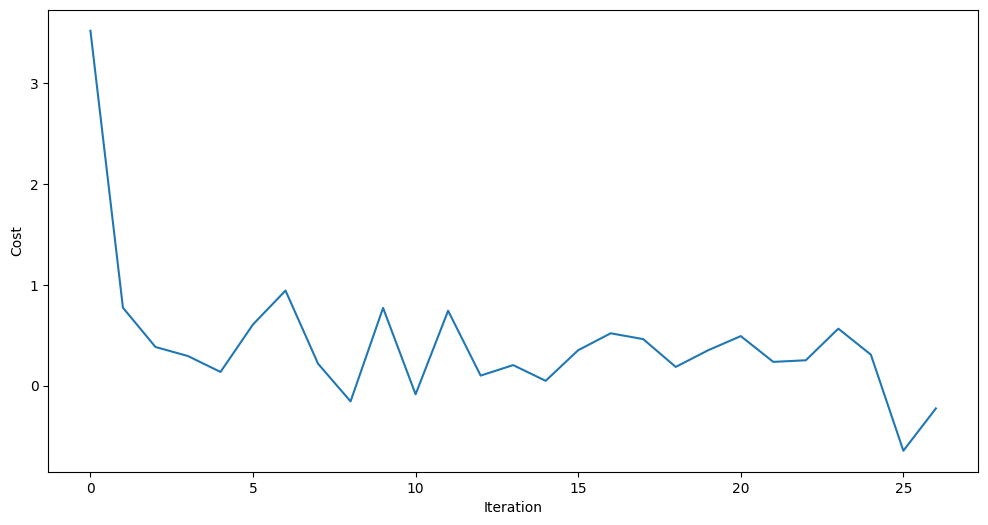

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(objective_func_vals)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

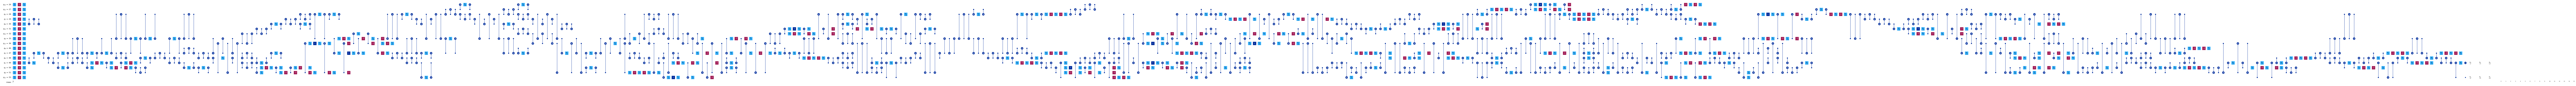

In [13]:
optimized_circuit = candidate_circuit.assign_parameters(result.x)
optimized_circuit.draw('mpl', fold=False, idle_wires=False)

In [15]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

# If using qiskit-ibm-runtime<0.24.0, change `mode=` to `backend=`
sampler = Sampler(mode=backend)
sampler.options.default_shots = 10000

# Set simple error suppression/mitigation options
#sampler.options.dynamical_decoupling.enable = True
#sampler.options.dynamical_decoupling.sequence_type = "XY4"
#sampler.options.twirling.enable_gates = True
#sampler.options.twirling.num_randomizations = "auto"

pub= (optimized_circuit, )
job = sampler.run([pub], shots=int(1e4))
counts_int = job.result()[0].data.meas.get_int_counts()
counts_bin = job.result()[0].data.meas.get_counts()
shots = sum(counts_int.values())
final_distribution_int = {key: val/shots for key, val in counts_int.items()}
final_distribution_bin = {key: val/shots for key, val in counts_bin.items()}
print(final_distribution_int)

{37820: 0.0001, 50274: 0.0001, 44521: 0.0001, 54381: 0.0001, 41213: 0.0002, 32652: 0.0001, 22435: 0.0001, 49581: 0.0001, 5829: 0.0001, 256: 0.0001, 23921: 0.0002, 9394: 0.0001, 26375: 0.0001, 15226: 0.0001, 5881: 0.0003, 12491: 0.0001, 11293: 0.0001, 40647: 0.0001, 21026: 0.0001, 38345: 0.0002, 3650: 0.0001, 64881: 0.0001, 13260: 0.0001, 47555: 0.0001, 30914: 0.0002, 25004: 0.0001, 24779: 0.0001, 52902: 0.0001, 60679: 0.0001, 22368: 0.0001, 48005: 0.0001, 5508: 0.0001, 37195: 0.0001, 18302: 0.0001, 17513: 0.0001, 35589: 0.0001, 46408: 0.0001, 37244: 0.0001, 37863: 0.0001, 40380: 0.0002, 25265: 0.0001, 33440: 0.0001, 5808: 0.0001, 37678: 0.0001, 45757: 0.0001, 4494: 0.0001, 61947: 0.0001, 37765: 0.0001, 24009: 0.0002, 48887: 0.0001, 41606: 0.0001, 10333: 0.0001, 7174: 0.0001, 59093: 0.0001, 48917: 0.0001, 8969: 0.0001, 57756: 0.0001, 48549: 0.0001, 4024: 0.0001, 12566: 0.0001, 37799: 0.0001, 45347: 0.0001, 56389: 0.0001, 56522: 0.0001, 65171: 0.0001, 4883: 0.0001, 35860: 0.0001, 58774: 

In [16]:
# auxiliary functions to sample most likely bitstring
def to_bitstring(integer, num_bits):
    result = np.binary_repr(integer, width=num_bits)
    return [int(digit) for digit in result]

keys = list(final_distribution_int.keys())
values = list(final_distribution_int.values())
most_likely = keys[np.argmax(np.abs(values))]
most_likely_bitstring = to_bitstring(most_likely, len(graph))
most_likely_bitstring.reverse()

print("Result bitstring:", most_likely_bitstring)

Result bitstring: [1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]


TypeError: only length-1 arrays can be converted to Python scalars

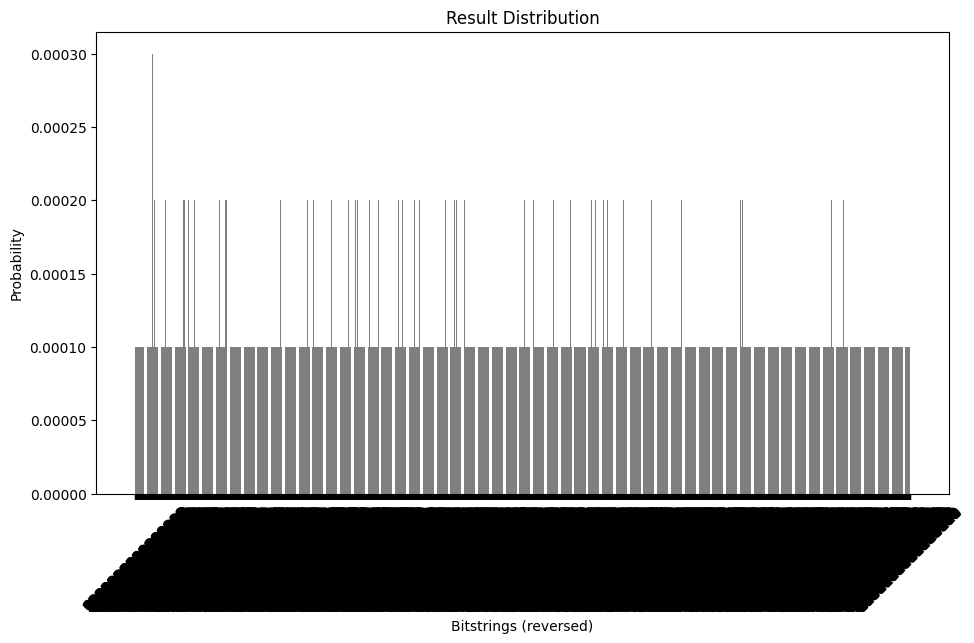

In [17]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({"font.size": 10})
final_bits = final_distribution_bin
values = np.abs(list(final_bits.values()))
top_4_values = sorted(values, reverse=True)[:4]
positions = []
for value in top_4_values:
    positions.append(np.where(values == value)[0])
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(rotation=45)
plt.title("Result Distribution")
plt.xlabel("Bitstrings (reversed)")
plt.ylabel("Probability")
ax.bar(list(final_bits.keys()), list(final_bits.values()), color="tab:grey")
for p in positions:
    ax.get_children()[int(p)].set_color("tab:purple")
plt.show()

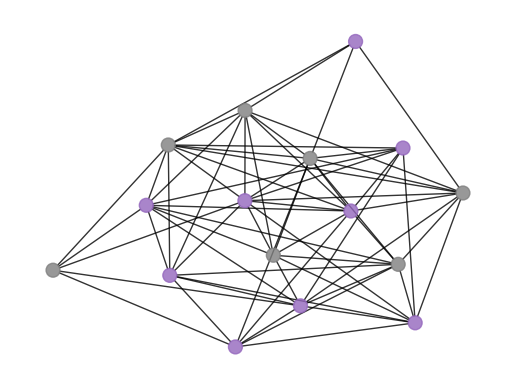

In [18]:
# auxiliary function to plot graphs
def plot_result(G, x):
    colors = ["tab:grey" if i == 0 else "tab:purple" for i in x]
    pos, default_axes = rx.spring_layout(G), plt.axes(frameon=True)
    rx.visualization.mpl_draw(G, node_color=colors, node_size=100, alpha=0.8, pos=pos)


plot_result(graph, most_likely_bitstring)

In [19]:
from typing import Sequence
def evaluate_sample(x: Sequence[int], graph: rx.PyGraph) -> float:
    assert len(x) == len(list(graph.nodes())), "The length of x must coincide with the number of nodes in the graph."
    return sum(x[u] * (1 - x[v]) + x[v] * (1 - x[u]) for u, v in list(graph.edge_list()))


cut_value= evaluate_sample(most_likely_bitstring, graph)
print('The value of the cut is:', cut_value)

The value of the cut is: 36


In [20]:
from qiskit_algorithms.optimizers import SPSA

objective_func_vals = [] # Global variable
with Session(backend=backend) as session:
    # If using qiskit-ibm-runtime<0.24.0, change `mode=` to `session=`
    estimator = Estimator(mode=session)
    estimator.options.default_shots = 1000

    # Set simple error suppression/mitigation options
    #estimator.options.dynamical_decoupling.enable = True
    #estimator.options.dynamical_decoupling.sequence_type = "XY4"
    #estimator.options.twirling.enable_gates = True
    #estimator.options.twirling.num_randomizations = "auto"

    def static_cost_func_estimator(params):
        ansatz = candidate_circuit
        hamiltonian = cost_hamiltonian
    
        # transform the observable defined on virtual qubits to
        # an observable defined on all physical qubits
        isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)

        pub = (ansatz, isa_hamiltonian, params)
        job = estimator.run([pub])

        results = job.result()[0]
        cost = results.data.evs

        objective_func_vals.append(cost)

        print(cost)
        return cost

    optimizer = SPSA(maxiter=300)

    result = optimizer.minimize(fun=static_cost_func_estimator,
        x0=init_params,
        #args=(candidate_circuit, cost_hamiltonian, estimator),
        #tol=1e-2,
        )
    print(result)

4.447552447552446
3.948051948051948
0.6213786213786217
0.26573426573426584
-0.0759240759240759
0.3716283716283716
0.6513486513486514
0.43556443556443564
4.063936063936063
4.641358641358641
3.9220779220779236
4.931068931068931
0.3416583416583416
0.8471528471528467
4.1918081918081915
4.257742257742258
4.2257742257742255
4.315684315684315
4.721278721278721
3.514485514485514
4.087912087912088
3.726273726273726
4.299700299700299
4.987012987012988
0.08191808191808203
0.8151848151848153
3.8681318681318673
3.6003996003996006
0.12787212787212787
-0.15584415584415587
5.13886113886114
5.420579420579422
4.93906093906094
4.155844155844156
4.383616383616384
4.019980019980021
0.8031968031968032
0.21178821178821172
4.639360639360638
4.423576423576424
4.555444555444555
3.9040959040959033
4.02997002997003
3.896103896103896
4.679320679320679
4.257742257742259
0.4295704295704297
0.1538461538461538
0.09790209790209796
0.5374625374625374
4.55944055944056
4.387612387612388
1.0369630369630372
3.29070929070929

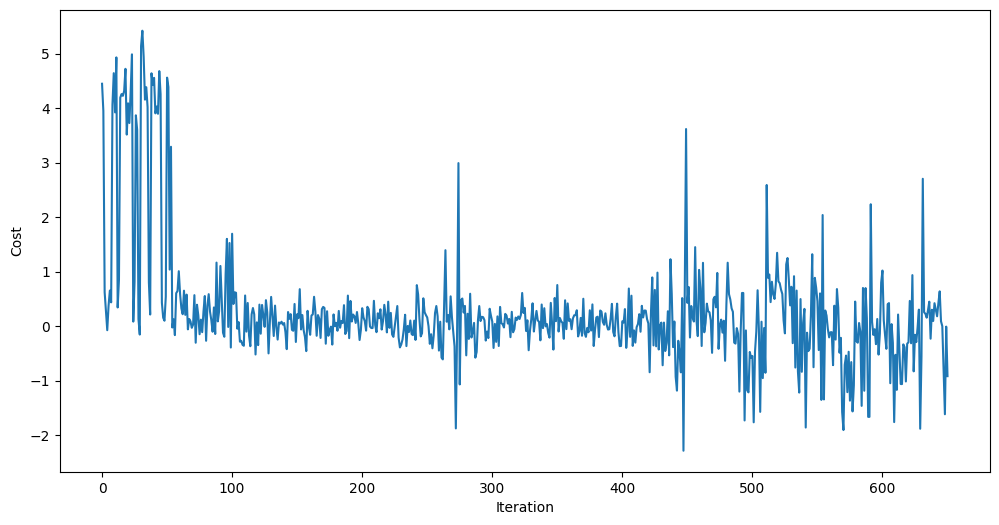

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(objective_func_vals)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

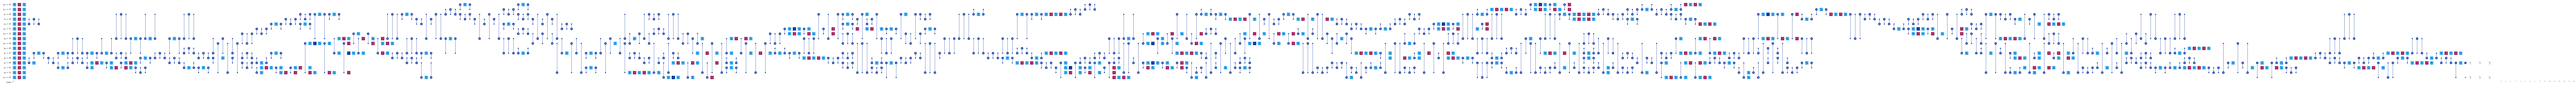

In [22]:
optimized_circuit = candidate_circuit.assign_parameters(result.x)
optimized_circuit.draw('mpl', fold=False, idle_wires=False)

In [23]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

# If using qiskit-ibm-runtime<0.24.0, change `mode=` to `backend=`
sampler = Sampler(mode=backend)
sampler.options.default_shots = 10000

# Set simple error suppression/mitigation options
#sampler.options.dynamical_decoupling.enable = True
#sampler.options.dynamical_decoupling.sequence_type = "XY4"
#sampler.options.twirling.enable_gates = True
#sampler.options.twirling.num_randomizations = "auto"

pub= (optimized_circuit, )
job = sampler.run([pub], shots=int(1e4))
counts_int = job.result()[0].data.meas.get_int_counts()
counts_bin = job.result()[0].data.meas.get_counts()
shots = sum(counts_int.values())
final_distribution_int = {key: val/shots for key, val in counts_int.items()}
final_distribution_bin = {key: val/shots for key, val in counts_bin.items()}
print(final_distribution_int)

{52737: 0.0001, 44756: 0.0001, 29865: 0.0001, 32119: 0.0001, 7503: 0.0001, 45069: 0.0001, 10357: 0.0001, 45677: 0.0001, 54475: 0.0001, 62372: 0.0002, 39491: 0.0001, 22966: 0.0002, 26337: 0.0003, 60733: 0.0001, 31083: 0.0001, 46446: 0.0001, 41120: 0.0001, 45720: 0.0002, 4213: 0.0001, 14036: 0.0001, 55322: 0.0001, 15395: 0.0001, 15708: 0.0001, 1434: 0.0001, 34307: 0.0002, 2000: 0.0002, 14673: 0.0002, 50368: 0.0001, 44416: 0.0001, 43152: 0.0002, 38363: 0.0001, 34023: 0.0002, 20522: 0.0001, 51976: 0.0001, 25288: 0.0002, 9374: 0.0001, 31758: 0.0001, 21241: 0.0001, 25520: 0.0003, 22682: 0.0001, 56095: 0.0001, 41447: 0.0002, 5105: 0.0001, 23431: 0.0001, 64550: 0.0001, 35029: 0.0002, 62577: 0.0003, 2692: 0.0001, 28258: 0.0001, 30820: 0.0001, 1889: 0.0001, 49396: 0.0001, 34277: 0.0001, 58230: 0.0001, 22447: 0.0001, 54339: 0.0001, 3384: 0.0001, 19345: 0.0001, 15052: 0.0002, 27557: 0.0001, 18455: 0.0001, 115: 0.0001, 2514: 0.0001, 41901: 0.0002, 30370: 0.0001, 15720: 0.0001, 33397: 0.0001, 8847: 

In [24]:
# auxiliary functions to sample most likely bitstring
def to_bitstring(integer, num_bits):
    result = np.binary_repr(integer, width=num_bits)
    return [int(digit) for digit in result]

keys = list(final_distribution_int.keys())
values = list(final_distribution_int.values())
most_likely = keys[np.argmax(np.abs(values))]
most_likely_bitstring = to_bitstring(most_likely, len(graph))
most_likely_bitstring.reverse()

print("Result bitstring:", most_likely_bitstring)

Result bitstring: [1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1]


TypeError: only length-1 arrays can be converted to Python scalars

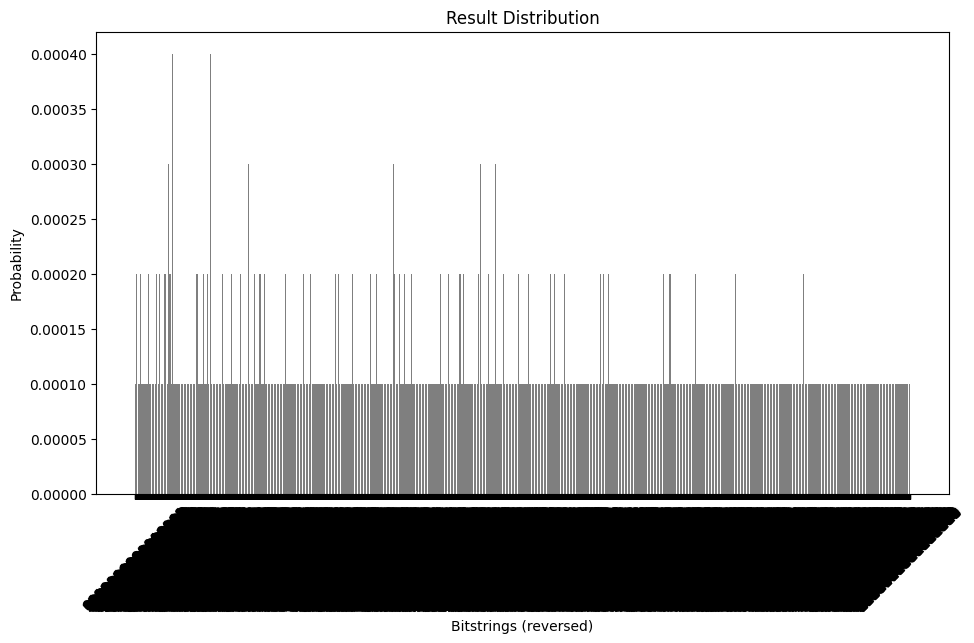

In [25]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({"font.size": 10})
final_bits = final_distribution_bin
values = np.abs(list(final_bits.values()))
top_4_values = sorted(values, reverse=True)[:4]
positions = []
for value in top_4_values:
    positions.append(np.where(values == value)[0])
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(rotation=45)
plt.title("Result Distribution")
plt.xlabel("Bitstrings (reversed)")
plt.ylabel("Probability")
ax.bar(list(final_bits.keys()), list(final_bits.values()), color="tab:grey")
for p in positions:
    ax.get_children()[int(p)].set_color("tab:purple")
plt.show()

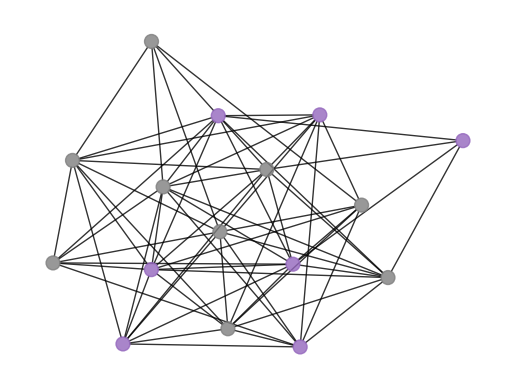

In [26]:
# auxiliary function to plot graphs
def plot_result(G, x):
    colors = ["tab:grey" if i == 0 else "tab:purple" for i in x]
    pos, default_axes = rx.spring_layout(G), plt.axes(frameon=True)
    rx.visualization.mpl_draw(G, node_color=colors, node_size=100, alpha=0.8, pos=pos)


plot_result(graph, most_likely_bitstring)

In [27]:
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_algorithms.optimizers import SPSA
from scipy.optimize import minimize

# Hyperparameter
alpha = 0.36  # Fraction of initial loss to switch optimizers

objective_func_vals = []

# Define the cost function for Optimization 1
def cost_func_estimator(params, circuit, hamiltonian, estimator):
    isa_hamiltonian = hamiltonian.apply_layout(circuit.layout)
    pub = (circuit, isa_hamiltonian, params)
    job = estimator.run([pub])
    results = job.result()[0]
    cost = results.data.evs

    objective_func_vals.append(cost)
    print(f"Cost (Optimization 1): {cost}")
    return cost

# Hybrid Optimizer
def hybrid_optimizer(init_params, candidate_circuit, cost_hamiltonian, alpha):
    global objective_func_vals
    objective_func_vals = []

    # Run Optimization 1
    print("Running Optimization 1...")
    with Session(backend=backend) as session:
        estimator = Estimator(mode=session)
        estimator.options.default_shots = 1000

        # Get the initial loss value
        initial_loss = cost_func_estimator(init_params, candidate_circuit, cost_hamiltonian, estimator)

        # Define a callback to stop when the loss is reduced
        def stopping_callback(xk):
            current_loss = objective_func_vals[-1]
            return current_loss <= alpha * initial_loss

        result_1 = minimize(
            cost_func_estimator,
            init_params,
            args=(candidate_circuit, cost_hamiltonian, estimator),
            method="COBYLA",
            tol=1e-2,
            callback=stopping_callback,
        )
        print("Optimization 1 complete.")
        print(result_1)

    # Run Optimization 2 using the final parameters from Optimization 1
    print("Running Optimization 2...")
    with Session(backend=backend) as session:
        estimator = Estimator(mode=session)
        estimator.options.default_shots = 1000

        # Define the cost function for Optimization 2
        def static_cost_func_estimator(params):
            isa_hamiltonian = cost_hamiltonian.apply_layout(candidate_circuit.layout)
            pub = (candidate_circuit, isa_hamiltonian, params)
            job = estimator.run([pub])
            results = job.result()[0]
            cost = results.data.evs

            objective_func_vals.append(cost)
            print(f"Cost (Optimization 2): {cost}")
            return cost

        optimizer = SPSA(maxiter=150)
        result_2 = optimizer.minimize(
            fun=static_cost_func_estimator,
            x0=result_1.x,  # Start from the results of Optimization 1
        )
        print("Optimization 2 complete.")
        print(result_2)

    return result_1, result_2


# Run the hybrid optimizer
result_1, result_2 = hybrid_optimizer(init_params, candidate_circuit, cost_hamiltonian, alpha)

SyntaxError: expected argument value expression (3232446254.py, line 70)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(objective_func_vals)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()